<a href="https://colab.research.google.com/github/malihasama07/ML-AI/blob/main/Project_Final_1_Emotion.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
df = pd.read_csv('/content/drive/MyDrive/Final_1_Emotion/Collect_Emotions.csv')

In [3]:
emotion_cols = ['Love', 'Joy', 'Anger', 'Surprise', 'Sadness', 'Fear', 'Hate']

# Step 1: Replace NaN with 0
df[emotion_cols] = df[emotion_cols].fillna(0)

# Step 2: Convert all possible values to numeric safely (ignore errors)
for col in emotion_cols:
    df[col] = pd.to_numeric(df[col], errors='coerce').fillna(0).astype(int)

print("Emotion columns cleaned successfully!")
print(df[emotion_cols].head())


Emotion columns cleaned successfully!
   Love  Joy  Anger  Surprise  Sadness  Fear  Hate
0     0    1      0         0        0     0     0
1     0    1      0         0        0     0     0
2     0    1      0         0        0     0     0
3     0    0      0         0        1     0     0
4     0    0      0         0        1     0     0


In [4]:
df.head()

,Data,Love,Joy,Anger,Surprise,Sadness,Fear,Hate,topic,Domain
0,youtube ar volg gula boring hoia jaitase din d...,0,1,0,0,0,0,0,Vlog,Twitter
1,your video making camera work is really good i...,0,1,0,0,0,0,0,Education,Twitter
2,you made me nostalgic college life a ei dokan ...,0,1,0,0,0,0,0,Vlog,Twitter
3,workshop ta engaging but resources ta insuffic...,0,0,0,0,1,0,0,Entertainment,Twitter
4,wifi use kora jayna vlo vabe speed khub e baje...,0,0,0,0,1,0,0,Vlog,Twitter


In [5]:
import os
import re
import string
import pandas as pd
from collections import Counter
import matplotlib.pyplot as plt
import seaborn as sns

In [6]:
print(df.shape);

(27865, 10)


In [7]:
display(df.tail())

,Data,Love,Joy,Anger,Surprise,Sadness,Fear,Hate,topic,Domain
27860,"Dui bochor age partite rekhe jaoyar por, Kedto...",0,0,0,1,0,0,0,personal,Youtube
27861,Edike chader shobdo doura douri porjaye pouchh...,0,0,0,1,0,0,0,personal,Youtube
27862,Eshiya Goldo Ojaoyardo 2019 Digital Transforma...,0,0,0,1,0,0,0,personal,Youtube
27863,Eshiya Pacific Council for Trade Facilitation ...,0,0,0,1,0,0,0,personal,Youtube
27864,Songosthati ei prokolper naam diyeche ‘daing o...,0,0,0,1,0,0,0,personal,Youtube


In [8]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27865 entries, 0 to 27864
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Data      27864 non-null  object
 1   Love      27865 non-null  int64 
 2   Joy       27865 non-null  int64 
 3   Anger     27865 non-null  int64 
 4   Surprise  27865 non-null  int64 
 5   Sadness   27865 non-null  int64 
 6   Fear      27865 non-null  int64 
 7   Hate      27865 non-null  int64 
 8   topic     27865 non-null  object
 9   Domain    27865 non-null  object
dtypes: int64(7), object(3)
memory usage: 2.1+ MB
None


In [9]:
print("Missing per col:\n", df.isna().sum())

Missing per col:
 Data        1
Love        0
Joy         0
Anger       0
Surprise    0
Sadness     0
Fear        0
Hate        0
topic       0
Domain      0
dtype: int64


In [10]:
print("Duplicate rows:", df.duplicated().sum())

Duplicate rows: 43


In [11]:
#Check how many duplicate texts exist
df['Data'] = df['Data'].astype(str)  # make sure it's string
duplicate_count = df['Data'].duplicated().sum()
print("Total duplicate texts:", duplicate_count)


Total duplicate texts: 55


In [12]:
#Show only duplicate rows (to inspect them)
duplicates = df[df['Data'].duplicated(keep=False)]
display(duplicates)


,Data,Love,Joy,Anger,Surprise,Sadness,Fear,Hate,topic,Domain
17711,just wow,0,1,0,1,0,0,0,personal,Youtube
17789,goosebumps,0,0,0,1,0,0,0,personal,Youtube
18073,wow,0,1,0,1,0,0,0,personal,Youtube
18078,excellent theme speechless,0,0,0,1,0,0,0,personal,Youtube
18084,wow redheartredheart,0,1,0,1,0,0,0,personal,Youtube
...,...,...,...,...,...,...,...,...,...,...
27846,i have been listening to audio stories in mird...,0,0,0,1,0,0,0,personal,Youtube
27847,wow thats so good i went back to that childhood,0,0,0,1,0,0,0,personal,Youtube
27848,redheartredheart just speechless,0,0,0,1,0,0,0,personal,Youtube
27849,dear mir afsar ali what did you do he kept us ...,0,0,0,1,0,0,0,personal,Youtube


In [13]:
#If you just want to see the repeated text values (not full rows)
dup_texts = df['Data'][df['Data'].duplicated()].unique()
print("Duplicate text samples:")
for t in dup_texts[:10]:  # show first 10
    print("-", t)

Duplicate text samples:
- excellent theme speechless
- wow
- just wow
- speechless
- goosebumps
- wow redheartredheartredheart
- wow redheartredheart
- wowredheart
- great acting
- over acting


In [14]:
#If you want to count how many times each text repeats
dup_counts = df['Data'].value_counts()
dup_counts = dup_counts[dup_counts > 1]
print(dup_counts)


Data
wow                                                                                                                                                                                                                                                                                                                                                                  11
just wow                                                                                                                                                                                                                                                                                                                                                              7
speechless                                                                                                                                                                                                                                                                         

In [15]:
#To remove duplicates based on “Data”
df = df.drop_duplicates(subset=['Data']).reset_index(drop=True)
print("Duplicates removed. New shape:", df.shape)


Duplicates removed. New shape: (27810, 10)


In [16]:
print("Duplicate rows:", df.duplicated().sum())


Duplicate rows: 0


In [17]:
EMOTION_COLS = ['Love', 'Joy', 'Anger', 'Surprise', 'Sadness', 'Fear', 'Hate']
print(df[EMOTION_COLS].sum())

Love        4331
Joy         4331
Anger       4331
Surprise    4332
Sadness     4331
Fear        4331
Hate        4331
dtype: int64


In [18]:
# 3) Basic label distribution
print("\n--- emotion positive counts (before cleaning) ---")
for c in EMOTION_COLS:
    # try safe numeric count (works if values are 0/1/NaN or strings)
    try:
        cnt = pd.to_numeric(df[c], errors='coerce').fillna(0).astype(int).sum()
    except Exception:
        cnt = (df[c] == 1).sum()
    print(f"{c}: {cnt}")


--- emotion positive counts (before cleaning) ---
Love: 4331
Joy: 4331
Anger: 4331
Surprise: 4332
Sadness: 4331
Fear: 4331
Hate: 4331


In [19]:
print(" Descriptive Statistics:")
display(df.describe())

 Descriptive Statistics:


,Love,Joy,Anger,Surprise,Sadness,Fear,Hate
count,27810.000000,27810.000000,27810.000000,27810.000000,27810.000000,27810.000000,27810.000000
mean,0.155735,0.155735,0.155735,0.155771,0.155735,0.155735,0.155735
std,0.362611,0.362611,0.362611,0.362645,0.362611,0.362611,0.362611
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000



 Histograms for numeric columns:


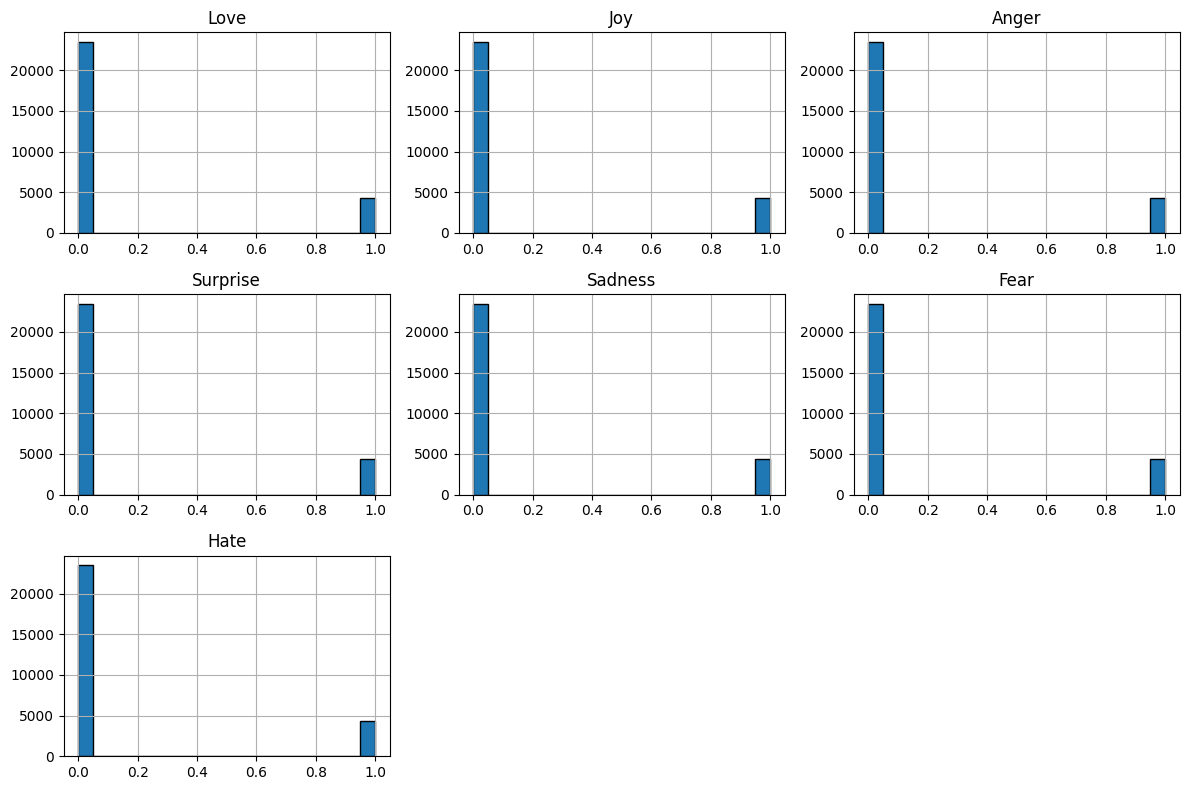

In [20]:
# 2) Histograms to understand distribution
print("\n Histograms for numeric columns:")
numeric_cols = df.select_dtypes(include='number').columns
df[numeric_cols].hist(figsize=(12, 8), bins=20, edgecolor='black')
plt.tight_layout()
plt.show()



Boxplots for numeric columns:


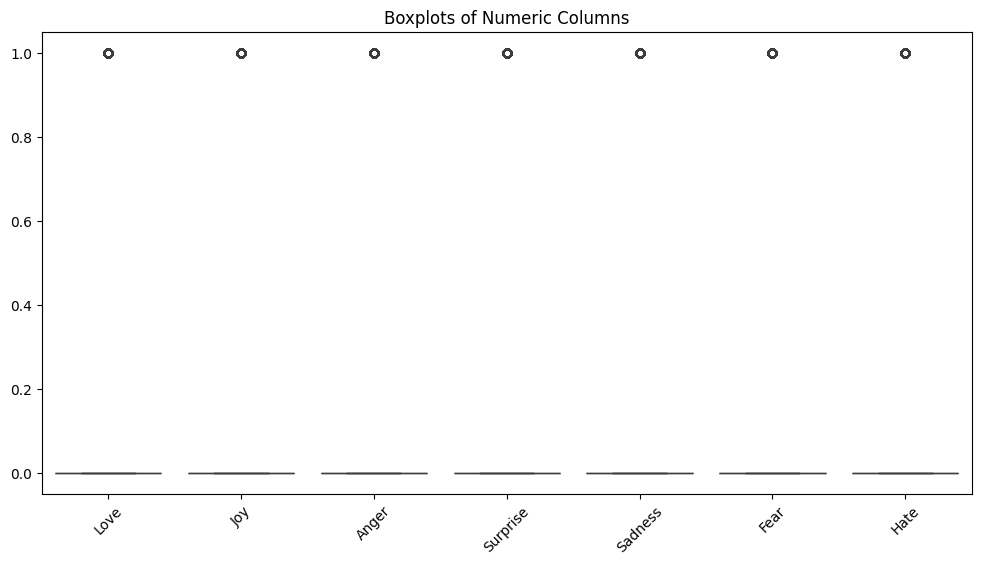

In [21]:
# 3) Boxplots to identify outliers
print("\nBoxplots for numeric columns:")
plt.figure(figsize=(12, 6))
sns.boxplot(data=df[numeric_cols])
plt.title("Boxplots of Numeric Columns")
plt.xticks(rotation=45)
plt.show()


Scatterplot matrix to see relationships:


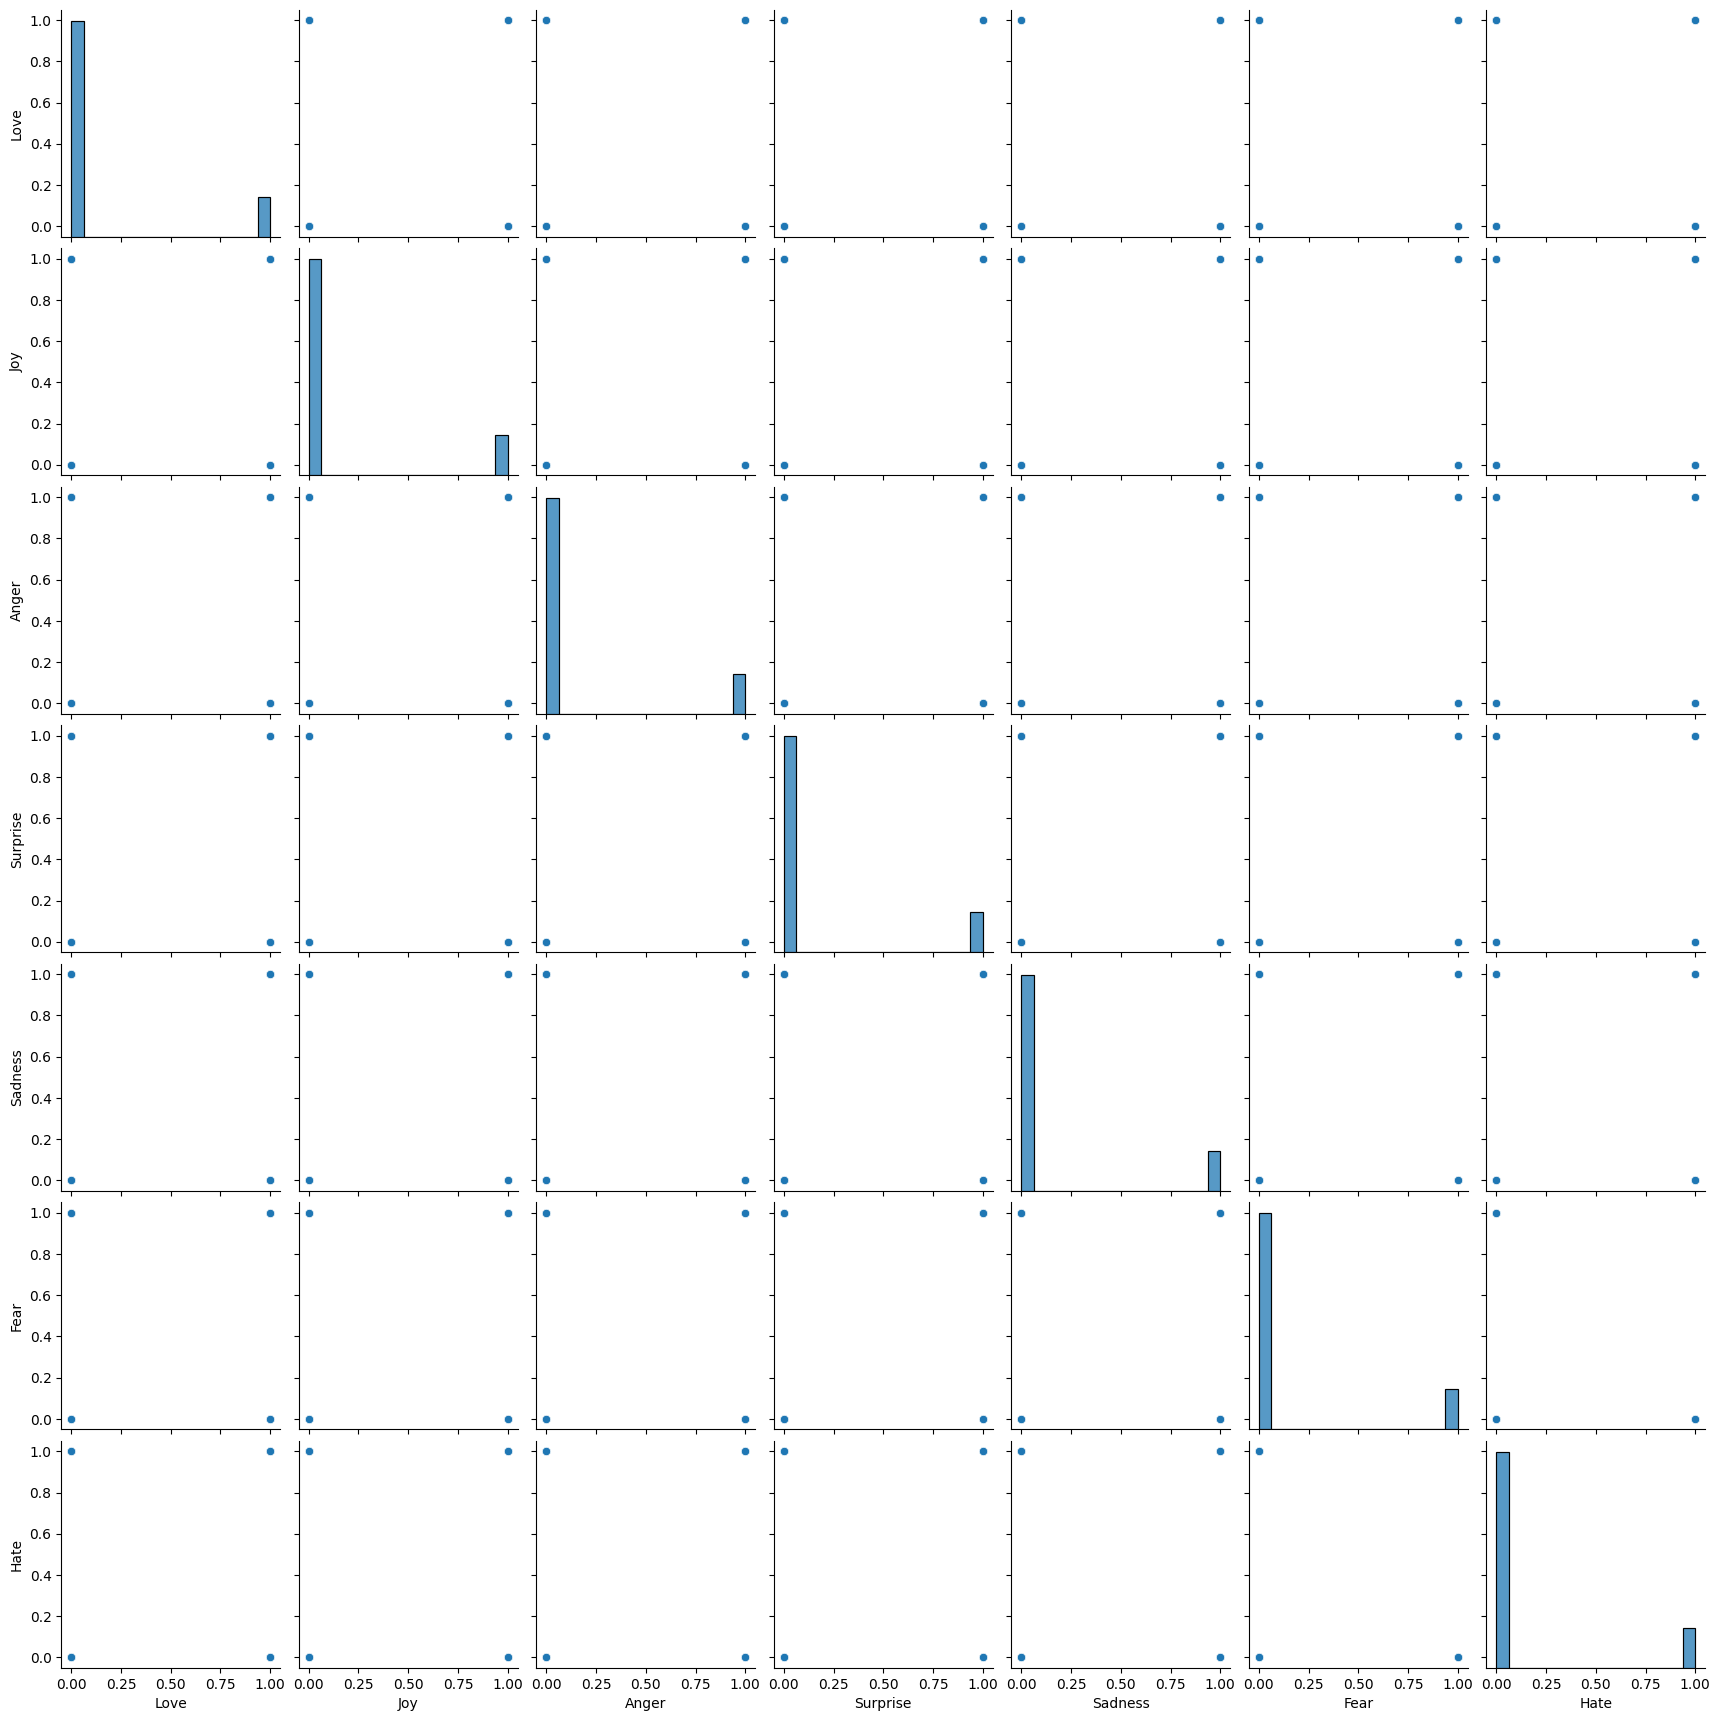

In [22]:
# 4) Scatter plots to understand relationships
# We'll plot all numeric columns pairwise
print("\nScatterplot matrix to see relationships:")
sns.pairplot(df[numeric_cols])
plt.show()



Correlation Heatmap:


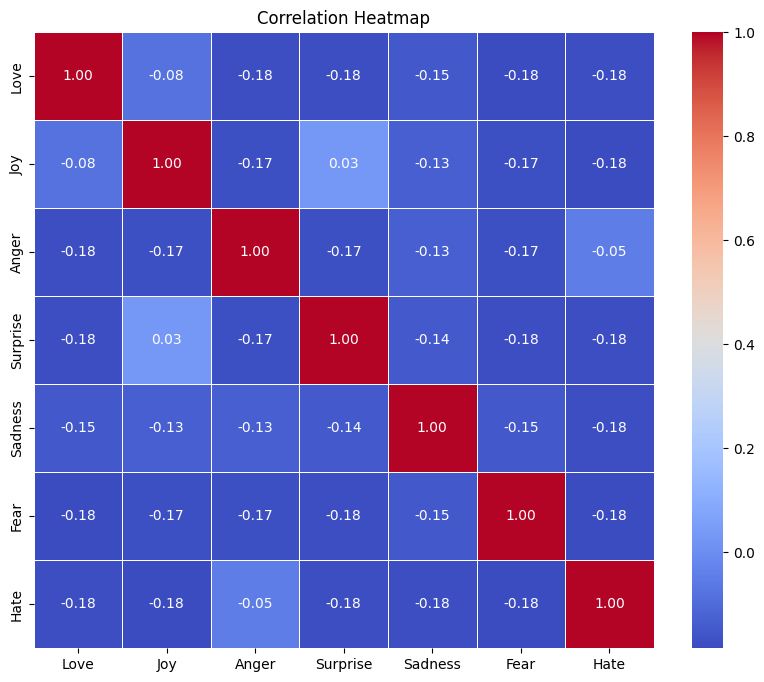

In [23]:
# 5) Correlation matrix with heatmap
print("\nCorrelation Heatmap:")
corr = df[numeric_cols].corr()
plt.figure(figsize=(10, 8))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title("Correlation Heatmap")
plt.show()

In [24]:
# Check for multicollinearity using Variance Inflation Factor (VIF)
from statsmodels.stats.outliers_influence import variance_inflation_factor

print("\nMulticollinearity check using VIF:")
X = df[numeric_cols].dropna()  # Drop rows with NaNs for VIF calculation
vif_data = pd.DataFrame()
vif_data["Feature"] = X.columns
vif_data["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
display(vif_data)


Multicollinearity check using VIF:


,Feature,VIF
0,Love,1.008373
1,Joy,1.043827
2,Anger,1.015575
3,Surprise,1.035068
4,Sadness,1.006337
5,Fear,1.000997
6,Hate,1.013234


In [25]:
import re
import pandas as pd

# --- Define emoji pattern first ---
emoji_re = re.compile(
    "["
    u"\U0001F600-\U0001F64F"  # emoticons
    u"\U0001F300-\U0001F5FF"  # symbols & pictographs
    u"\U0001F680-\U0001F6FF"  # transport & map
    u"\U0001F1E0-\U0001F1FF"  # flags
    u"\U00002700-\U000027BF"  # dingbats
    u"\U0001F900-\U0001F9FF"  # supplemental symbols
    u"\U00002600-\U000026FF"  # misc symbols
    u"\U00002B00-\U00002BFF"  # arrows, etc
    u"\U00002000-\U000023FF"  # punctuation & technical symbols
    "]+", flags=re.UNICODE)

# --- Then define your cleaning function ---
def clean_text(text):
    if pd.isna(text):
        return ""
    text = str(text)
    # remove _x000d_
    text = re.sub(r'_x000d_', ' ', text, flags=re.IGNORECASE)
    # remove URLs, mentions, hashtags
    text = re.sub(r'http\S+|www\S+|https\S+', ' ', text)
    text = re.sub(r'@\w+', ' ', text)
    text = re.sub(r'#\w+', ' ', text)
    # remove emojis
    text = emoji_re.sub('', text)
    # remove punctuation, keep letters & numbers
    text = ''.join(ch for ch in text if ch.isalnum() or ch.isspace())
    # lowercasing
    text = text.lower()
    # collapse spaces
    text = re.sub(r'\s+', ' ', text).strip()
    return text

print("emoji_re and clean_text() defined successfully!")


emoji_re and clean_text() defined successfully!


In [26]:
df['Data'] = df['Data'].apply(clean_text)
print("Text cleaned successfully!")

Text cleaned successfully!


In [27]:
print(df.shape);


(27810, 10)


In [28]:
TEXT_COL = 'Data'
# Remove rows where text empty after cleaning
before_rows = len(df)
df = df[df[TEXT_COL].str.strip() != '']
print(f"Removed {before_rows - len(df)} rows with empty text after cleaning. Remaining: {len(df)}")


Removed 0 rows with empty text after cleaning. Remaining: 27810


In [31]:
# Remove duplicates (based on cleaned text) and reset index
dups_before = df.duplicated(subset=[TEXT_COL]).sum()
df = df.drop_duplicates(subset=[TEXT_COL]).reset_index(drop=True)
print("Dropped duplicates (based on text):", dups_before)

Dropped duplicates (based on text): 0


In [32]:
EMOTION_COLS = ['Love', 'Joy', 'Anger', 'Surprise', 'Sadness', 'Fear', 'Hate']
for col in EMOTION_COLS:
    df[col] = pd.to_numeric(df[col], errors='coerce').fillna(0).astype(int)



In [33]:
# show new label counts
print("\n--- emotion positive counts (after cleaning) ---")
for c in EMOTION_COLS:
    print(f"{c}: {df[c].sum()}")


--- emotion positive counts (after cleaning) ---
Love: 4331
Joy: 4331
Anger: 4331
Surprise: 4331
Sadness: 4331
Fear: 4331
Hate: 4331


In [34]:
print(df.shape);

(27809, 10)


In [35]:
print("\n--- Preview of dataset ---")
display(df.head(10))


--- Preview of dataset ---


,Data,Love,Joy,Anger,Surprise,Sadness,Fear,Hate,topic,Domain
0,youtube ar volg gula boring hoia jaitase din d...,0,1,0,0,0,0,0,Vlog,Twitter
1,your video making camera work is really good i...,0,1,0,0,0,0,0,Education,Twitter
2,you made me nostalgic college life a ei dokan ...,0,1,0,0,0,0,0,Vlog,Twitter
3,workshop ta engaging but resources ta insuffic...,0,0,0,0,1,0,0,Entertainment,Twitter
4,wifi use kora jayna vlo vabe speed khub e baje...,0,0,0,0,1,0,0,Vlog,Twitter
5,west bengal er best food vlogger dadar subscri...,0,0,0,0,0,0,0,Brand,Twitter
6,well infinix brand ta oppo vivo techno theke f...,0,1,0,0,1,0,0,Personal,Twitter
7,weekend a eto chill korlam but monday e phire ...,0,0,0,0,1,0,0,Vlog,Youtube
8,weather ta bhalo but traffic jam ta bhorer dik...,0,0,0,0,1,0,0,Vlog,Youtube
9,weather forecast dekhe khushi hoye berolam ekh...,0,0,0,1,0,0,0,Brand,Youtube


In [36]:
# Save your full preprocessed dataset
df.to_csv("collect_preprocessed_dataset.csv", index=False)

print(" File saved as collect_preprocessed_dataset.csv")


 File saved as collect_preprocessed_dataset.csv
